Part-1
1. Implementing Sigmoid Function:
The sigmoid function is given by:

σ(x) = 1
1 + exp−x

(1)

where:x ∈ R

1. Task To Do:
• Implement the Logistic Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
import numpy as np

def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.

    Arguments:
    x: scalar or numpy array of any size.

    Returns:
    y: logistic function applied to x.
    """
    y = 1 / (1 + np.exp(-x))
    return y


In [60]:
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

test_logistic_function()

All tests passed!


2. Implementing Log Loss Function:
In general, loss function corresponds to observed error value between target value and predicted value for
single observation/data points.
For Sigmoid Regression and Binary Classification we use log - loss given by:

L(y, yˆ) = −y log (ˆy) − (1 − y) log (1 − yˆ) (2)

where:
y ∈ {0, 1} : True target value
yˆ = P(y = 1|x) : Predicted target value

2. Task To Do:
• Implement the Log - loss Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [61]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target value y' in {0-1}.

    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted target value {0-1}.

    Returns:
    loss (float): loss/error value
    """
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.1) ==> 0.10536051565782628
log loss(1, 0.9) ==> 0.10536051565782628


In [62]:
# Test Case for log-loss function
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Partially correct prediction (y_true = 1, y_pred = 0.8)
    y_true = 1
    y_pred = 0.8
    expected_loss = - (1 * np.log(0.8) + 0 * np.log(0.2))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

    # Test case 4: Partially correct prediction (y_true = 0, y_pred = 0.2)
    y_true = 0
    y_pred = 0.2
    expected_loss = - (0 * np.log(0.2) + 1 * np.log(0.8))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")

test_log_loss()

All tests passed!


3. Implementing Cost Function:

 Task To Do:
• Implement the Cost Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [63]:

def cost_function(y_true, y_pred):
    """
    Computes average log loss (cost function) for arrays of true and predicted values.

    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted probabilities (0 <= y_pred <= 1)

    Returns:
    cost (float): average log loss over all examples
    """
    assert len(y_true) == len(y_pred), "Length of true values and predicted values do not match"

    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i], y_pred[i]) for i in range(n)])
    cost = np.mean(loss_vec)

    return cost

In [64]:
def test_cost_function():
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    expected_cost = (
        - (1 * np.log(0.9) + (1 - 1) * np.log(1 - 0.9)) +
        - (0 * np.log(0.1) + (1 - 0) * np.log(1 - 0.1)) +
        - (1 * np.log(0.8) + (1 - 1) * np.log(1 - 0.8))
    ) / 3

    result = cost_function(y_true, y_pred)

    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
    print("Test passed for simple case!")

test_cost_function()

Test passed for simple case!


4. Task To Do:
• Implement the vectorized cost function costfunction logreg Function by completing the
code or writing your own function.
• Make sure you pass the test case.

In [65]:
def sigmoid(z):
    """Compute sigmoid function."""
    return 1 / (1 + np.exp(-z))

def costfunction_logreg(X, y, w, b):
    """
    Computes the vectorized logistic regression cost function L(w, b).

    Args:
    X (ndarray, shape (n_samples, n_features)): Feature matrix
    y (ndarray, shape (n_samples,)): True target values (0 or 1)
    w (ndarray, shape (n_features,)): Weight parameters
    b (float): Bias parameter

    Returns:
    cost (float): Average log loss
    """
    n_samples = X.shape[0]

    z = np.dot(X, w) + b

    y_pred = sigmoid(z)

    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    loss = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    cost = np.mean(loss)

    return cost

X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

print(f"Cost: {costfunction_logreg(X, y, w, b)}")


Cost: 5.500008350834906


5. Task To Do:
• Implement the compute gradient Function by completing the code or writing your own
function.

• Make sure you pass the test case.

In [66]:
import numpy as np

def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function w.r.t. weights w and bias b.

    Args:
    X (ndarray, shape (n,d)): Input features (n examples, d features)
    y (array_like, shape (n,)): True labels (0 or 1)
    w (array_like, shape (d,)): Weight parameters
    b (float): Bias parameter

    Returns:
    grad_w (ndarray, shape (d,)): Gradient w.r.t. weights
    grad_b (float): Gradient w.r.t. bias
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    z = np.dot(X, w) + b

    y_pred = sigmoid(z)

    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n

    return grad_w, grad_b

X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


5.2 Gradient Descent for Sigmoid Regression:
6. Task To Do:
• Implement the gradient descent Function by completing the code or writing your own
function.

• Make sure you pass the test case.

In [67]:
def sigmoid(z):
    """Compute sigmoid function."""
    return 1 / (1 + np.exp(-z))

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function w.r.t weights and bias.
    """
    n, d = X.shape
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n
    return grad_w, grad_b

def costfunction_logreg(X, y, w, b):
    """
    Computes vectorized logistic regression cost function.
    """
    n = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost = np.mean(loss)
    return cost

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Batch gradient descent for logistic regression.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if (show_cost or show_params) and (i % 100 == 0 or i == n_iter - 1):
            if show_cost:
                print(f"Iteration {i}: Cost = {cost:.6f}")
            if show_params:
                print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=True, show_params=False
)

print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693


A simple assertion test for gradient descent Function:

In [68]:
def test_gradient_descent():
    """
    Simple assertion test for gradient_descent function.
    """
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y = np.array([1, 0])
    w = np.zeros(X.shape[1])
    b = 0.0
    alpha = 0.1
    n_iter = 100

    w_out, b_out, cost_history, _ = gradient_descent(
        X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
    )

    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"

    print("All tests passed!")

test_gradient_descent()


All tests passed!


Code for Plotting Cost Vs. Iteration during Gradient Descent:

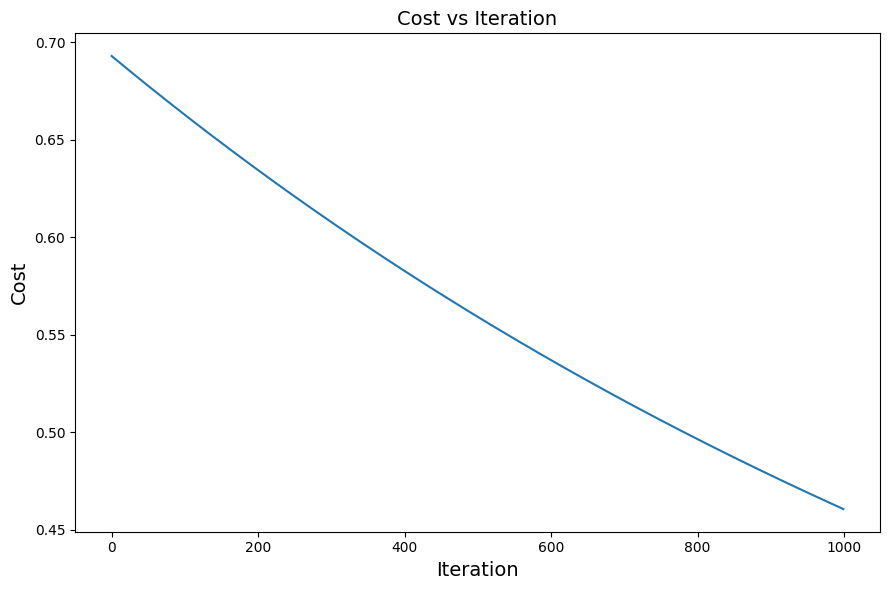

In [69]:
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

7. Task To Do:
• Implement the prediction Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [70]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
    X (ndarray, shape (n,d)): Array of test features with n samples and d features.
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold. Default is 0.5.

    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted class labels (0 or 1).
    """
    z = np.dot(X, w) + b
    y_prob = 1 / (1 + np.exp(-z))
    y_pred = (y_prob >= threshold).astype(int)
    return y_pred

def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    expected_output = np.array([0, 1, 1])

    y_pred = prediction(X_test, w_test, b_test, threshold)

    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed!")

test_prediction()


Test passed!


8. Task To Do:
• Implement evaluate classification Function by completing the code or writing your own
function.
• Make sure you pass the test case.

In [71]:

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.

    Arguments:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).

    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0


    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


3.2 Putting Helper Function to Action - Sigmoid Regression for the dataset:
Dataset Used: "pima-indians-diabetes.data.csv"
1. Some Basic Data Operation, Loading, Analysis and Cleaning:

Necessary Import and Loading of the Dataset:

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Some Basic Data Cleaning:

In [74]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)
data.fillna(data.median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Summary Statistics:

In [75]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Train Test Split and Standard Scaling of the Data:

Train - Test Split Followed by Standard Scaling:

In [76]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Training of the Sigmoid Regression:


In [77]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [78]:
def costfunction_logreg(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    cost = -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
    return cost

In [79]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False):
    m = X.shape[0]
    cost_history = []
    params_history = []

    for i in range(n_iter):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)

        dw = np.dot(X.T, (y_hat - y)) / m
        db = np.sum(y_hat - y) / m

        w -= alpha * dw
        b -= alpha * db

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and i % (n_iter//10) == 0:
            print(f"Iteration {i}: Cost {cost:.6f}")
        if show_params and i % (n_iter//10) == 0:
            print(f"w: {w}, b: {b}")

    return w, b, cost_history, params_history

In [80]:
def prediction(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_prob = sigmoid(z)
    return (y_prob >= threshold).astype(int)

In [81]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return confusion_matrix, precision, recall, f1_score

Training the Model:

In [82]:
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
print("\nTraining Logistic Regression Model:")
w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False
)


Training Logistic Regression Model:
Iteration 0: Cost 0.676575
Iteration 100: Cost 0.465441
Iteration 200: Cost 0.455913
Iteration 300: Cost 0.453874
Iteration 400: Cost 0.453316
Iteration 500: Cost 0.453148
Iteration 600: Cost 0.453096
Iteration 700: Cost 0.453079
Iteration 800: Cost 0.453073
Iteration 900: Cost 0.453072


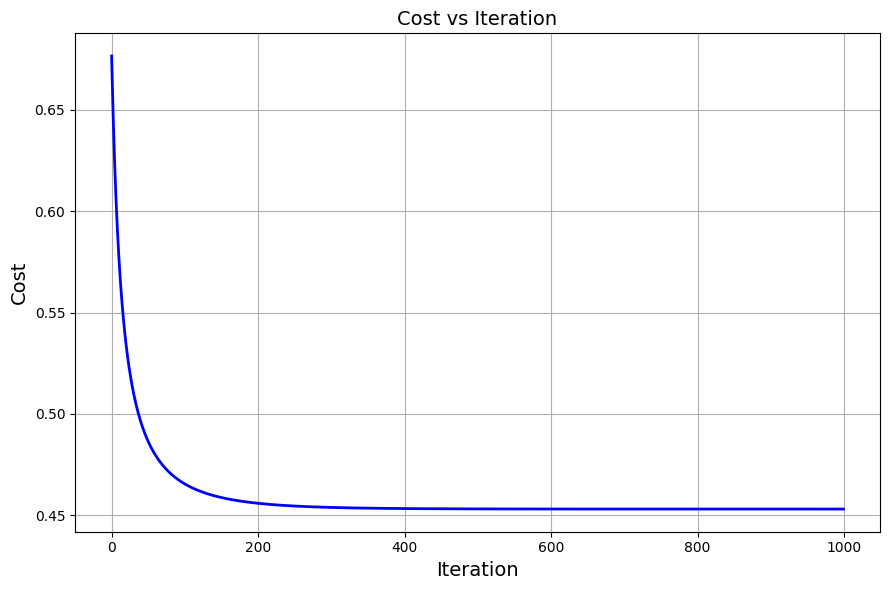

In [83]:
plt.figure(figsize=(9, 6))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


4. Did the Model Overfitt or Underfitt?

Evaluating Train and Test Performance on Cost Value:

In [84]:
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


5.How well my model did?

Evalation on various Metrics for Classification:

In [85]:
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

conf_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55
